In [1]:
import gzip
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pyarrow.ipc as ipc
import pyarrow.feather as feather

from utils.loading import *

## tag analysis
from collections import Counter
import gensim.downloader as api
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
NOTEBOOK_PATH = os.getcwd()
DATA_PATH = os.path.join(NOTEBOOK_PATH, "data_youniverse")
CATEGORY = "People & Blogs"
CATEGORY_FILE_NAME = ''.join(CATEGORY.split(" ")).lower()
CATEGORY_FILE_PATH = os.path.join(DATA_PATH, f"df_channels_{CATEGORY_FILE_NAME}.tsv.gz")

# Data Loading

In [3]:
df_yt_metadata_filtered = pd.read_csv(CATEGORY_FILE_PATH, compression="infer")
df_yt_metadata_filtered['upload_date'] = pd.to_datetime(df_yt_metadata_filtered['upload_date'])
df_yt_metadata_filtered.head()

,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,upload_date,view_count
0,People & Blogs,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:35.725333,0.0,LZPh8ky-RP8,175,8.0,"thomas train,thomas toby,thomas salty,thomas p...",2015-11-07,1307.0
1,People & Blogs,UCzWmWTPCafQRNl9q9Y53AfQ,2019-11-17 05:07:30.405938,613.0,BDnF-EgqAGw,398,49464.0,"vine,vines,vine compilation,chaotic good",2019-02-05,1142835.0
2,People & Blogs,UCzWmWTPCafQRNl9q9Y53AfQ,2019-11-17 05:07:30.959894,588.0,wrTIXbQED80,375,32726.0,"vines,vine,vine compilation,neutral good,align...",2019-01-31,819654.0
3,People & Blogs,UCzWmWTPCafQRNl9q9Y53AfQ,2019-11-17 05:07:31.467288,1177.0,uyWL0ZWibyU,335,86222.0,"vine,vines,vine compilation,neutral evil",2019-01-22,2159837.0
4,People & Blogs,UCzWmWTPCafQRNl9q9Y53AfQ,2019-11-17 05:07:31.948318,673.0,yd7d51AgSso,319,30596.0,NaN,2019-01-15,736707.0


# Tag Evolution in People & Blogs Over The Years

## Number of Tags Listed Per Year

In [ ]:
# make new column with number of tags for each video
df_yt_metadata_filtered['tag_count'] = df_yt_metadata_filtered['tags'].astype(str).apply(lambda x: len(x.split(',')))

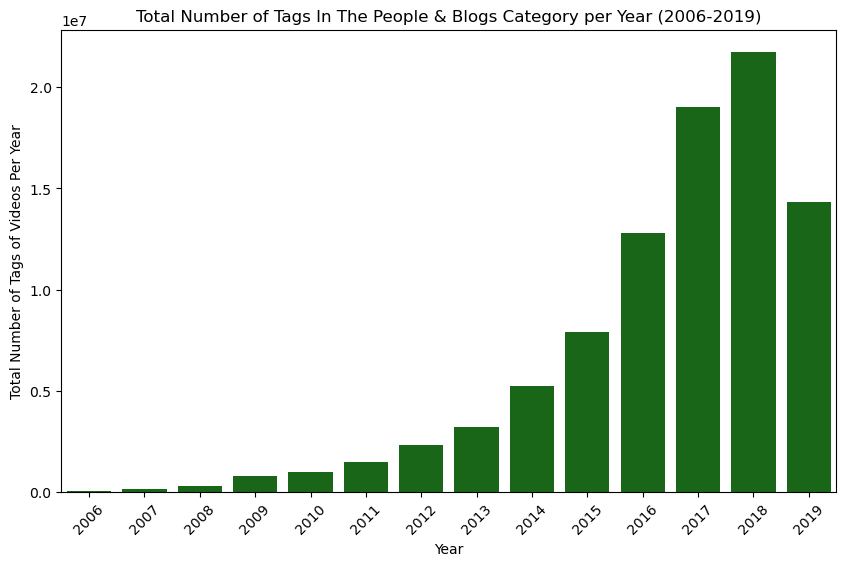

In [108]:
# calculate sum of tags per year
tag_count_per_year = df_yt_metadata_filtered.groupby(df_yt_metadata_filtered["upload_date"].dt.year)['tag_count'].sum()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=tag_count_per_year.index, y=tag_count_per_year.values, color="g", saturation=0.6)
plt.xticks(rotation=45)
plt.ylabel("Total Number of Tags of Videos Per Year")
plt.xlabel("Year")
plt.title("Total Number of Tags In The People & Blogs Category per Year (2006-2019)")
plt.show();

## Mean Number of Tags Per Year 

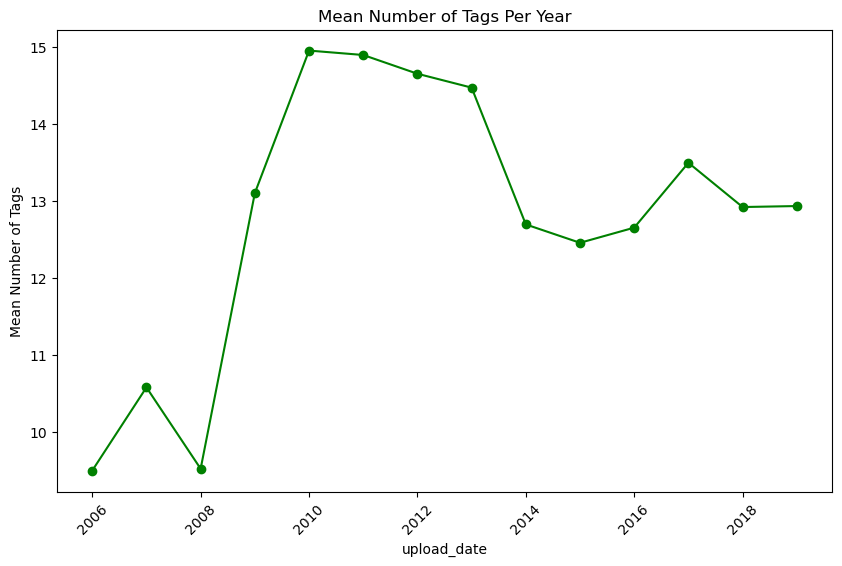

In [111]:
# Calculate the mean number of tags per year
mean_tag_count_per_year = df_yt_metadata_filtered.groupby(df_yt_metadata_filtered["upload_date"].dt.year)['tag_count'].mean()

# Create the line plot with dots
plt.figure(figsize=(10, 6))
mean_tag_count_per_year.plot(kind='line', marker='o', color="g")
plt.xticks(rotation=45)
plt.ylabel("Mean Number of Tags")
plt.title("Mean Number of Tags Per Year")
plt.show()


## Sub Categories

Topic #0:
food recipe vegan in disney eating christmas cooking to youtube recipes the street healthy chicken how toys eat diet mukbang review toy challenge keto and
Topic #1:
of the god jesus christian bible is and healing church life religion to tv christ you love prayer beer spirit holy people islam truth spiritual
Topic #2:
tarot love reading astrology horoscope 2018 2019 reaction gay weekly the 2017 psychic kpop de cancer in leo football aries taurus virgo scorpio gemini libra
Topic #3:
news live stock hair tv latest today analysis market cnbc technical awaaz india trump abp somoy in bangladesh hindi bangla local election 2018 comedy top
Topic #4:
vlog family vlogs the life baby daily kids in vlogger and funny mom day fun travel vloggers video new my vlogging cute couple of with
Topic #5:
to how for in tips make weight fitness workout home money health diy get business loss tutorial and of training your free online best school
Topic #6:
video the game movie of new reaction funny best comedy vs film games tv world in top wwe and dj song van trailer full gaming
Topic #7:
art review car fishing book rv the to bike books living house truck in how painting and best water cars cleaning fish camping with trailer
Topic #8:
asmr birthday happy music song songs musical bitcoin to video 2018 sounds beat planner dance with yoga best ali sleep for khan massage you type
Topic #9:
haul makeup movies fashion beauty review new 2017 the 2018 latest tutorial yoruba on vape and lego dollar nigerian 2016 for celebrity shopping style best

From the list of words in each topic, we can infer potential subcategories or themes. A possible interpretation of each topic could be:

- Topic #0: Cooking and Food (with a focus on vegan recipes, Christmas, and potentially food-related challenges or reviews on YouTube)
- Topic #1: Religion and Spirituality (words like Jesus, Christian, Bible, church, prayer, spirit)
- Topic #2: Astrology and Horoscopes (terms related to astrology signs and psychic readings)
- Topic #3: News and Financial Analysis (with references to live TV, stock analysis, and various news outlets)
- Topic #4: Family and Daily Vlogging (keywords indicate content about family life and daily activities)
- Topic #5: Health and Fitness (including weight loss, fitness tips, and DIY health topics)
- Topic #6: Entertainment and Gaming (focusing on reaction videos, movies, games, and comedy)
- Topic #7: Outdoor and Lifestyle (with references to fishing, cars, books, and RV travel)
- Topic #8: Music and Personal Care (including ASMR, birthdays, and various music-related terms)
- Topic #9: Fashion and Beauty (with words indicating makeup, fashion, beauty tutorials, and reviews)

Each topic aggregates words that frequently co-occur in the dataset, suggesting they share a common theme or subject matter. These subcategories can be useful for understanding the main interests or content types within the text data analyzed.

In [4]:
df_yt_metadata_filtered.head(5)

,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,upload_date,view_count
0,People & Blogs,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:35.725333,0.0,LZPh8ky-RP8,175,8.0,"thomas train,thomas toby,thomas salty,thomas p...",2015-11-07,1307.0
1,People & Blogs,UCzWmWTPCafQRNl9q9Y53AfQ,2019-11-17 05:07:30.405938,613.0,BDnF-EgqAGw,398,49464.0,"vine,vines,vine compilation,chaotic good",2019-02-05,1142835.0
2,People & Blogs,UCzWmWTPCafQRNl9q9Y53AfQ,2019-11-17 05:07:30.959894,588.0,wrTIXbQED80,375,32726.0,"vines,vine,vine compilation,neutral good,align...",2019-01-31,819654.0
3,People & Blogs,UCzWmWTPCafQRNl9q9Y53AfQ,2019-11-17 05:07:31.467288,1177.0,uyWL0ZWibyU,335,86222.0,"vine,vines,vine compilation,neutral evil",2019-01-22,2159837.0
4,People & Blogs,UCzWmWTPCafQRNl9q9Y53AfQ,2019-11-17 05:07:31.948318,673.0,yd7d51AgSso,319,30596.0,NaN,2019-01-15,736707.0


In [21]:
keywords_pattern = r'god|jesus|bible'
filtered_df = df_yt_metadata_filtered[df_yt_metadata_filtered['tags'].str.contains(keywords_pattern, case=False, na=False)]


In [22]:
channel_ids_with_keywords = filtered_df['channel_id'].unique()

# Display the channel IDs

In [23]:
df_channels_en = pd.read_csv(os.path.join(DATA_PATH, "df_channels_en.tsv.gz"), compression="infer", sep="\t")
df_channels_people_and_blogs = df_channels_en[df_channels_en['category_cc']==CATEGORY]


In [24]:
df_channels_people_and_blogs_people = df_channels_people_and_blogs[df_channels_people_and_blogs['channel'].isin(channel_ids_with_keywords)]

df_channels_people_and_blogs_people

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
98,People & Blogs,2011-08-10,UCpko_-a4wgz2u_DgDgd9fqA,BuzzFeedVideo,19400000,6334,158.0,2.0870
137,People & Blogs,2006-12-06,UCAuUUnT6oDeKwE6v1NGQxug,TED,14800000,3105,211.0,2.0870
180,People & Blogs,2014-12-19,UCmh5gdwCx6lN7gEC20leNVA,David Dobrik,13900000,601,280.0,2.0870
249,People & Blogs,2010-02-15,UCtinbF-Q-fVthA0qrFQTgXQ,CaseyNeistat,11500000,1015,405.0,2.0870
295,People & Blogs,2013-04-09,UCay_OLhWtf9iklq8zg_or0g,As/Is,10600000,3932,484.0,2.0870
...,...,...,...,...,...,...,...,...
136280,People & Blogs,2014-10-11,UCt77E6Snkjq_YiqJRh5zs9Q,BNK,10100,71,977488.0,53.1435
136285,People & Blogs,2014-12-09,UCUaCuRt-Xby_gTFzlWKBMUQ,newa,10300,23,977706.0,53.1435
136338,People & Blogs,2017-11-07,UCDkfaTI-FZN8COOsAadpJaQ,Vod Highlights,10300,320,985193.0,53.1435
136370,People & Blogs,2006-10-05,UC1ogu_KF_ziD-pzFmHORwZw,Jera Sky,10100,678,987525.0,53.1435
